
### **Importations**

In [2]:
import pandas as pd
import plotly.express as px
from matplotlib import pyplot as plt
from shapely.geometry import LineString, Point

from speed_visualizer.config import INPUT_PATH
from speed_visualizer.utils import __latlon_point_to_utm, __utm_point_to_lonlat

In [3]:
import os

trips = pd.read_csv(os.path.join(INPUT_PATH, 'trips.txt'))
shapes = pd.read_csv(os.path.join(INPUT_PATH, 'shapes.txt'))
stop_times = pd.read_csv(os.path.join(INPUT_PATH, 'stop_times.txt'))
stops = pd.read_csv(os.path.join(INPUT_PATH, 'stops.txt'))


### **Displaying **

In [4]:
trips.head()

,route_id,service_id,trip_id,trip_headsign,trip_short_name,direction_id,block_id,shape_id,wheelchair_accessible,bikes_allowed
0,468,D,073ac436-0-29bd321d-9,Villa Emanuel,NaN,0,NaN,1122123218,NaN,NaN
1,468,D,c41b4c56-d-29bd321d-9,Villa Emanuel,NaN,0,NaN,1122123218,NaN,NaN
2,468,D,18fb2f28-6-29bd321d-9,Baquedano,NaN,1,NaN,1122123219,NaN,NaN
3,468,D,59554543-4-29bd321d-9,Villa Emanuel,NaN,0,NaN,1122123218,NaN,NaN
4,468,D,e99f9f4b-2-29bd321d-9,Baquedano,NaN,1,NaN,1122123219,NaN,NaN


In [5]:
shapes.head()

,shape_id,shape_pt_lat,shape_pt_lon,shape_pt_sequence
0,1122123218,-36.64062,-72.13520,1
1,1122123218,-36.64062,-72.13520,2
2,1122123218,-36.64062,-72.13520,3
3,1122123218,-36.64038,-72.13483,4
4,1122123218,-36.64029,-72.13468,5


In [6]:
stop_times.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,timepoint
0,073ac436-0-29bd321d-9,08:00:00,08:00:00,120-1,1,NaN,NaN,NaN,1
1,073ac436-0-29bd321d-9,08:01:00,08:01:00,120-5,2,NaN,NaN,NaN,0
2,073ac436-0-29bd321d-9,08:02:00,08:02:00,120-6,3,NaN,NaN,NaN,0
3,073ac436-0-29bd321d-9,08:03:00,08:03:00,120-7,4,NaN,NaN,NaN,0
4,073ac436-0-29bd321d-9,08:06:00,08:06:00,107-4,5,NaN,NaN,NaN,0


In [7]:
stops.head()

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station,wheelchair_boarding
0,120-1,NaN,Av. Baquedano esq. Gabriela Mistral,NaN,-36.640283,-72.134588,NaN,NaN,NaN,NaN,NaN
1,120-5,NaN,Av. Baquedano esq. Pablo Neruda,NaN,-36.638495,-72.131816,NaN,NaN,NaN,NaN,NaN
2,120-6,NaN,Av. Baquedano esq. Cabildo,NaN,-36.637797,-72.130684,NaN,NaN,NaN,NaN,NaN
3,120-7,NaN,Av. Baquedano esq. Entrada a Santuario,NaN,-36.634624,-72.126115,NaN,NaN,NaN,NaN,NaN
4,107-4,NaN,Erasmo Escala esq. Conde del Maule,NaN,-36.628075,-72.127618,NaN,NaN,NaN,NaN,NaN



### **Parameters**

In [643]:
route_id = 467
direction_id = 0
time_interval = 0


### **Obtaining Shapes**

In [644]:
trips_queried = trips[(trips["route_id"] == route_id) & (trips["direction_id"] == direction_id)]
trips_queried = trips_queried[["shape_id", "trip_id"]]
trips_queried.head()

,shape_id,trip_id
296,1122123216,6be4704f-b-29bd321d-9
297,1122123216,526f596f-8-29bd321d-9
298,1122123216,2613fa48-7-29bd321d-9
299,1122123216,70237e2d-e-29bd321d-9
301,1122123216,b20d4225-5-29bd321d-9


In [646]:
shapes_dict = {}

for i in list(trips_queried.shape_id.unique()):
    shapes_dict[f'{i}'] = trips_queried[trips_queried["shape_id"] == i]['trip_id'].tolist()

shapes_list = list(shapes_dict.keys())
shapes_list

['1122123216']


### **Shape/Trip selection**

In [647]:
shape = shapes_list[0]
trip = shapes_dict[shape][0]
print(f"trip : {trip}, shape : {shape}")
# frecuencia de aparición shape_id
# puntos al final de la ruta
# automatizar zona horaria
# velocidades
# typer
# GitHub y DOCS
# Ajustar a calle (algoritmo de map matching)
# mensajes sobre el mapa para mostrar parámetros con los que se ejecutó
# algoritmo de selección de paraderos
# mejorar acceso a dataframes

trip : 6be4704f-b-29bd321d-9, shape : 1122123216



### **Linestring curve**

In [648]:
curve_lat_lon = shapes[shapes["shape_id"] == int(shape)][["shape_pt_lon", "shape_pt_lat"]]
curve_lat_lon

,shape_pt_lon,shape_pt_lat
3663,-72.097880,-36.628730
3664,-72.097880,-36.628730
3665,-72.097880,-36.628730
3666,-72.097780,-36.628500
3667,-72.097560,-36.628430
...,...,...
4138,-72.079310,-36.582150
4139,-72.079140,-36.582190
4140,-72.078960,-36.582220
4141,-72.078791,-36.582239


In [649]:
curve_utm = []

for i in range(len(curve_lat_lon.axes[0])):

    x,y = __latlon_point_to_utm(curve_lat_lon.iloc[i,0], curve_lat_lon.iloc[i,1])
    curve_utm += [{'shape_pt_x': x, 'shape_pt_y' : y}]

curve_utm = pd.DataFrame(curve_utm)
curve_utm

,shape_pt_x,shape_pt_y
0,759501.494149,5.942390e+06
1,759501.494149,5.942390e+06
2,759501.494149,5.942390e+06
3,759511.210145,5.942415e+06
4,759531.121997,5.942422e+06
...,...,...
475,761319.655972,5.947508e+06
476,761334.735065,5.947503e+06
477,761350.742833,5.947499e+06
478,761365.803272,5.947497e+06


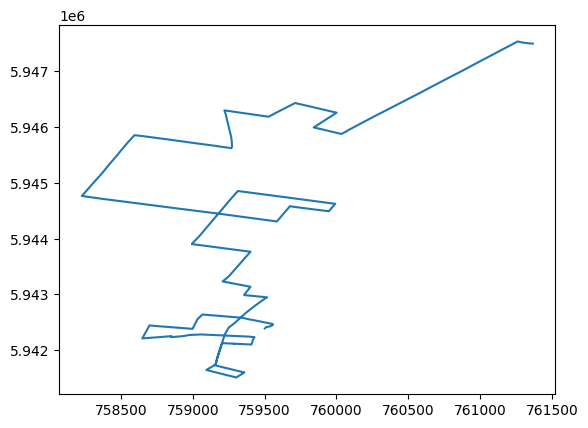

In [650]:
ls = LineString(curve_utm)
plt.plot(*ls.xy)


### **Point stops**

In [651]:
stop_times[stop_times["trip_id"] == trip] # ordenarlo por shape_id, stop_sequence

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,timepoint
52754,6be4704f-b-29bd321d-9,08:03:00,08:03:00,84-3,1,NaN,NaN,NaN,0
52755,6be4704f-b-29bd321d-9,08:07:00,08:07:00,84-4,2,NaN,NaN,NaN,0
52756,6be4704f-b-29bd321d-9,08:09:00,08:09:00,50-2,3,NaN,NaN,NaN,0
52757,6be4704f-b-29bd321d-9,08:10:00,08:10:00,50-4,4,NaN,NaN,NaN,0
52758,6be4704f-b-29bd321d-9,08:12:00,08:12:00,114-1,5,NaN,NaN,NaN,0
52759,6be4704f-b-29bd321d-9,08:14:00,08:14:00,81-2,6,NaN,NaN,NaN,0
52760,6be4704f-b-29bd321d-9,08:15:00,08:15:00,84-2,7,NaN,NaN,NaN,0
52761,6be4704f-b-29bd321d-9,08:16:00,08:16:00,8-1,8,NaN,NaN,NaN,0
52762,6be4704f-b-29bd321d-9,08:18:00,08:18:00,82-1,9,NaN,NaN,NaN,0
52763,6be4704f-b-29bd321d-9,08:18:00,08:18:00,51-1,10,NaN,NaN,NaN,0


In [652]:
stops

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station,wheelchair_boarding
0,120-1,NaN,Av. Baquedano esq. Gabriela Mistral,NaN,-36.640283,-72.134588,NaN,NaN,NaN,NaN,NaN
1,120-5,NaN,Av. Baquedano esq. Pablo Neruda,NaN,-36.638495,-72.131816,NaN,NaN,NaN,NaN,NaN
2,120-6,NaN,Av. Baquedano esq. Cabildo,NaN,-36.637797,-72.130684,NaN,NaN,NaN,NaN,NaN
3,120-7,NaN,Av. Baquedano esq. Entrada a Santuario,NaN,-36.634624,-72.126115,NaN,NaN,NaN,NaN,NaN
4,107-4,NaN,Erasmo Escala esq. Conde del Maule,NaN,-36.628075,-72.127618,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
307,53-1,53-1,Real Audiencia esq. Luis Arellano,NaN,-36.615459,-72.129906,NaN,NaN,NaN,NaN,NaN
308,52-1,52-1,Rosauro Acuña esq. Santa Maria,NaN,-36.620359,-72.107313,NaN,NaN,NaN,NaN,NaN
309,14-1,NaN,14-1 - Isabel Riquelme esq. Libertad,NaN,-36.607375,-72.099429,NaN,NaN,NaN,NaN,NaN
310,111-1,NaN,Calle Granaderos esq. Demetrio O Higgins Puga,NaN,-36.627523,-72.110866,NaN,NaN,NaN,NaN,NaN


In [653]:
stops[stops["stop_id"] == "84-3"]

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station,wheelchair_boarding
180,84-3,84-3,Barros Arana esq. Las Margaritas,NaN,-36.631039,-72.10113,NaN,NaN,NaN,NaN,NaN


In [654]:
stops_list = stop_times[stop_times["trip_id"] == trip]["stop_id"].tolist()

In [655]:
stops_lat_lon = stops[stops["stop_id"].isin(stops_list)][['stop_id', 'stop_name', 'stop_lon', 'stop_lat']]
stops_lat_lon

,stop_id,stop_name,stop_lon,stop_lat
16,13-2,5 De Abril esq. Maipon,-72.102280,-36.610890
21,18-1,Av. Libertad esq. Yerbas Buenas,-72.093790,-36.608391
51,18-3,Av. Libertad esq. 5 De Abril,-72.100419,-36.606769
55,21-8,Maipon esq. Mercado De Chillan,-72.101484,-36.610449
58,21-5,Maipon esq. 18 De Septiembre,-72.105441,-36.609509
59,21-4,Maipon esq. Claudio Arrau,-72.107932,-36.608909
60,21-3,Maipon esq. Plaza La Victoria,-72.109066,-36.608579
79,15-1,Independencia esq. Constitucion,-72.096833,-36.609268
81,21-2,Maipon esq. Rosas,-72.111037,-36.608129
82,21-1,Maipon esq. Av. Brasil,-72.112352,-36.607799


In [656]:
stops_utm = []

for i in range(len(stops_lat_lon.axes[0])):
    stop_id = stops_lat_lon.iloc[i,0]
    stop_name = stops_lat_lon.iloc[i,1]
    x,y = __latlon_point_to_utm(stops_lat_lon.iloc[i,2], stops_lat_lon.iloc[i,3])
    stops_utm += [{'stop_id' : stop_id, 'stop_name' : stop_name ,'shape_pt_x': x, 'shape_pt_y' : y}]

stops_utm = pd.DataFrame(stops_utm)
stops_utm

,stop_id,stop_name,shape_pt_x,shape_pt_y
0,13-2,5 De Abril esq. Maipon,759167.731555,5.944381e+06
1,18-1,Av. Libertad esq. Yerbas Buenas,759935.649181,5.944635e+06
2,18-3,Av. Libertad esq. 5 De Abril,759348.030818,5.944833e+06
3,21-8,Maipon esq. Mercado De Chillan,759240.419944,5.944428e+06
4,21-5,Maipon esq. 18 De Septiembre,758889.567431,5.944543e+06
5,21-4,Maipon esq. Claudio Arrau,758668.723021,5.944616e+06
6,21-3,Maipon esq. Plaza La Victoria,758568.374957,5.944656e+06
7,15-1,Independencia esq. Constitucion,759660.467817,5.944546e+06
8,21-2,Maipon esq. Rosas,758393.545788,5.944711e+06
9,21-1,Maipon esq. Av. Brasil,758277.002581,5.944751e+06


In [657]:
ls = LineString(curve_utm)

stops_in_shape = []
asd = []

for i in range(len(stops_lat_lon.axes[0])):

    stop_id = stops_utm.iloc[i,0]
    stop_name = stops_utm.iloc[i,1]

    pt = Point(stops_utm.iloc[i][2], stops_utm.iloc[i][3])

    prj =  ls.interpolate(ls.project(pt))
    asd += [(prj.x, prj.y)]

    lon, lat = __utm_point_to_lonlat(prj.x, prj.y, 18, 'H')

    stops_in_shape += [{'stop_id' : stop_id, 'stop_name' : stop_name, 'shape_pt_lon' : lon,
                        'shape_pt_lat': lat}]

stops_in_shape = pd.DataFrame(stops_in_shape)
stops_in_shape
asd

C:\Users\diego\AppData\Local\Programs\Python\Python39\lib\site-packages\shapely\linear.py:90: RuntimeWarning:

invalid value encountered in line_locate_point



[(759157.1620202775, 5944384.543746402),
 (759938.0594755015, 5944642.504768498),
 (759350.7271876257, 5944841.49045551),
 (759240.3196545021, 5944427.5516212275),
 (758889.3691152049, 5944542.239449294),
 (758668.4970288343, 5944615.4623868195),
 (758566.262214841, 5944649.427057123),
 (759663.7100186555, 5944545.24232968),
 (758392.0777477303, 5944706.557017364),
 (758275.6784102101, 5944747.542950828),
 (758262.3363664894, 5944866.33926255),
 (758311.5319087191, 5945010.862391237),
 (758365.5111154539, 5945164.181771751),
 (759705.2149871812, 5944721.84555305),
 (759389.4153354382, 5942243.057184207),
 (758988.6591594962, 5942273.456980961),
 (759121.6015720753, 5944276.499788316),
 (759386.4186313485, 5944377.546815207),
 (758403.6281267512, 5945285.1163520925),
 (758447.9034463768, 5945417.591217726),
 (758490.9542970689, 5945551.764830564),
 (759204.8579963348, 5942141.909855844),
 (759157.170937732, 5941744.963125743),
 (758654.3497650049, 5942238.5488729505),
 (759028.385111243

In [658]:
import utm
utm.from_latlon(-36.640283, -72.134588)

(756180.052604152, 5941206.187597305, 18, 'H')

In [659]:
def generate_stop_matching_evaluation_map(shape_, stops_, filename, auto_open=False):
    mapbox_access_token = 'pk.eyJ1IjoidHJhbnNhcHAiLCJhIjoiY2w4czhubzh3MXhwajNwbzgwM2dzM3R6bCJ9.vsA2xogBFcRYH2DbwDOb4w'

    # all stops
    fig = px.scatter_mapbox(stops_, lat='shape_pt_lat', lon='shape_pt_lon', hover_name='stop_name',
                            color_discrete_sequence=['yellow'], hover_data=['stop_id', 'stop_name'],
                            zoom=11, height=700, title="stops")

    # shape
    fig2 = px.line_mapbox(shape_, lat='shape_pt_lat', lon='shape_pt_lon', color_discrete_sequence=['blue'])

    fig.add_trace(fig2.data[0])

    fig.update_layout(mapbox_style="dark", mapbox_accesstoken=mapbox_access_token)
    fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
    fig.show()
    fig.write_html(os.path.join(TMP_PATH, '{0}.html'.format(filename)), auto_open=auto_open)

In [660]:
#TO DO: investigar variar flechas para representar direcciones

In [661]:
generate_stop_matching_evaluation_map(curve_lat_lon, stops_in_shape, "chillan", True)


### **Particionar segmentos**

In [698]:
from shapely.ops import split

def shape_partition(line, points):

    partition = []

    for point in points:

        part = split(line, point)
        line = list(part.geoms)[0]
        line_next = list(part.geoms)[1]

        partition += [line]

        line = line_next

    return partition + [line]

In [692]:
asdfg = ls
asdfg_ = [Point(759501.4941490631, 5942389.511932061)]
print(asdfg_[0])

asd_partition = shape_partition(asdfg, asdfg_)


part = split(asdfg, asdfg_)
part

POINT (759501.4941490631 5942389.511932061)
GEOMETRYCOLLECTION (LINESTRING (759501.4941490631 5942389.511932061, 759501.4941490631 5942389.511932061, 759501.4941490631 5942389.511932061, 759511.2101445664 5942414.763962287, 759531.1219968224 5942421.936506713, 759542.2576720768 5942434.927955963, 759551.4367183194 5942442.42512446, 759556.1773119605 5942451.167249472, 759558.2682581971 5942461.100222391, 759556.6808591143 5942467.812396416, 759550.554267956 5942472.440502569, 759507.3658802917 5942494.850026056, 759465.0716935869 5942517.232271737, 759465.0716935869 5942517.232271737, 759465.9526847848 5942516.761353556, 759465.0716935869 5942517.232271737, 759427.1822748119 5942537.25972759, 759416.5834855782 5942542.022948056, 759399.7573155123 5942548.085117871, 759355.7744059102 5942573.849901609, 759355.7744059102 5942573.849901609, 759343.4537793079 5942580.886449851, 759332.7878169449 5942583.4302100595, 759314.4858692538 5942540.666482921, 759302.9312398338 5942513.803806797, 7

IndexError: list index out of range

In [701]:
line_ = LineString([(1,2),(2,3),(3,4),(4,5)])
points_ = [Point(2,3), Point(3,4)]

partitions_ = shape_partition(line_, points_)
partitions_

[<LINESTRING (1 2, 2 3)>, <LINESTRING (2 3, 3 4)>, <LINESTRING (3 4, 4 5)>]

In [680]:
asdf = [asd[0]]
partitions_2 = shape_partition(ls, [asdf])

AttributeError: 'list' object has no attribute 'geom_type'

In [672]:
partitions_2 = shape_partition(ls, asd)

GEOMETRYCOLLECTION (LINESTRING (759501.4941490631 5942389.511932061, 759501.4941490631 5942389.511932061, 759501.4941490631 5942389.511932061, 759511.2101445664 5942414.763962287, 759531.1219968224 5942421.936506713, 759542.2576720768 5942434.927955963, 759551.4367183194 5942442.42512446, 759556.1773119605 5942451.167249472, 759558.2682581971 5942461.100222391, 759556.6808591143 5942467.812396416, 759550.554267956 5942472.440502569, 759507.3658802917 5942494.850026056, 759465.0716935869 5942517.232271737, 759465.0716935869 5942517.232271737, 759465.9526847848 5942516.761353556, 759465.0716935869 5942517.232271737, 759427.1822748119 5942537.25972759, 759416.5834855782 5942542.022948056, 759399.7573155123 5942548.085117871, 759355.7744059102 5942573.849901609, 759355.7744059102 5942573.849901609, 759343.4537793079 5942580.886449851, 759332.7878169449 5942583.4302100595, 759314.4858692538 5942540.666482921, 759302.9312398338 5942513.803806797, 759302.9312398338 5942513.803806797, 759294.2

IndexError: list index out of range


### **Graphic**

In [665]:
def vel_to_color(vel):

    if vel in [0.0,5.0]:
        return #magenta
    elif [5.0,7.5]



SyntaxError: invalid syntax (2734851754.py, line 5)

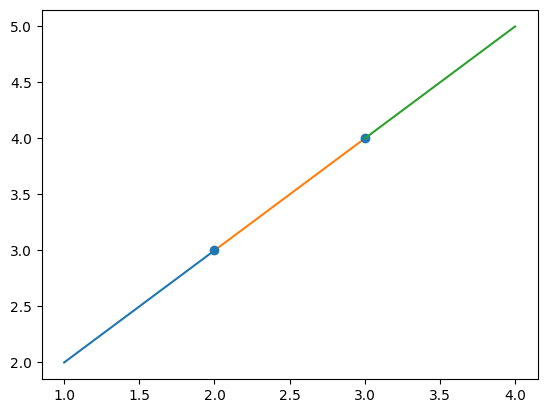

In [702]:
def plot_utm_shapes_partitions(partitions, points):

    xs = [point.x for point in points]
    ys = [point.y for point in points]

    # partitioned shape
    for order, partition in enumerate(partitions):
        plt.plot(*partition.xy, zorder = order)

    # stops
    plt.scatter(xs, ys)

    plt.show()

plot_utm_shapes_partitions(partitions_, points_)